In [23]:
# Going through neural networks.
import tensorflow as tf

mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9

(x_train,y_train), (x_test,y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)



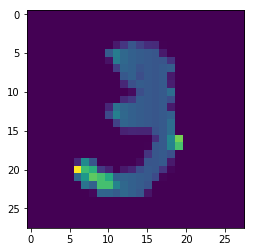

In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap=plt.cm.viridis)
plt.show()
#print(x_train[0])

In [27]:
model = tf.keras.models.Sequential()
#now flatten the 28x28 file 1 dimension at end
model.add(tf.keras.layers.Flatten())
# use 128 neurons, use relu for rectified linear
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.softmax))

# now define some parameters for the training of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.3188 - acc: 0.9112
Epoch 2/3
60000/60000 [==============================] - 4s 73us/step - loss: 0.1199 - acc: 0.9633: 0s - loss: 0.1207 - acc: 0
Epoch 3/3
60000/60000 [==============================] - 4s 69us/step - loss: 0.0833 - acc: 0.9736


In [28]:
# need to check to see if there is overfitting of the data above.
# a model can easily memorize.  need to calculate valuation loss and valuation accuracy
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

10000/10000 [==============================] - 0s 32us/step
0.09749731200467796 0.9692


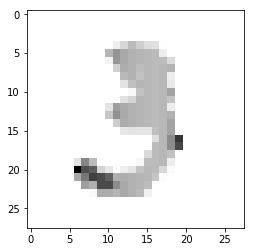

In [29]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap=plt.cm.binary)
plt.show()
#print(x_train[0])

In [31]:
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict([x_test])

In [32]:
print(predictions)

[[2.4699521e-08 1.9479457e-07 1.6754041e-04 ... 1.1903850e-13
  4.3797350e-13 2.5214405e-12]
 [1.8876891e-08 6.1445264e-04 9.9935609e-01 ... 2.0314626e-15
  5.7892622e-15 1.0474365e-14]
 [9.8170815e-08 9.9974233e-01 1.1050176e-05 ... 2.9127231e-10
  3.1088443e-10 4.8887722e-10]
 ...
 [1.1329041e-08 7.6085817e-06 5.1453941e-07 ... 4.3532417e-11
  7.3262542e-12 2.5459013e-11]
 [4.3039074e-07 3.3139605e-07 9.5636040e-08 ... 3.1739358e-14
  4.2400100e-13 3.0718001e-13]
 [4.6663747e-08 2.8897714e-06 3.6528795e-07 ... 4.9800957e-13
  5.3060085e-13 3.9468228e-13]]


In [33]:
# the above is the probability distributions.  use numpy to determine actual predictions

In [34]:
import numpy as np
print(np.argmax(predictions[0]))

7


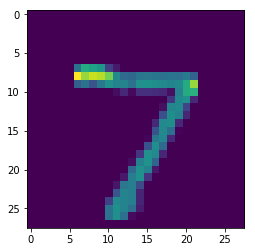

In [36]:
plt.imshow(x_test[0])
plt.show()

In [ ]:
# the model works!
